In [3]:
!wget https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/Pesos/SEGMENTACI%C3%93N/COCO/COCO.zip -O COCO.zip


--2024-11-11 02:59:39--  https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/Pesos/SEGMENTACI%C3%93N/COCO/COCO.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/Pesos/SEGMENTACI%C3%93N/COCO/COCO.zip [following]
--2024-11-11 02:59:40--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/Pesos/SEGMENTACI%C3%93N/COCO/COCO.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45755944 (44M) [application/zip]
Saving to: ‘COCO.zip’

COCO.zip            100%[===================>]  43.64M   145MB/s    in 0.3s    

2024-11-11 02:59

In [4]:
!unzip -d COCO COCO.zip

Archive:  COCO.zip
  inflating: COCO/BoxF1_curve.png    
  inflating: COCO/BoxP_curve.png     
  inflating: COCO/BoxPR_curve.png    
  inflating: COCO/BoxR_curve.png     
  inflating: COCO/confusion_matrix.png  
  inflating: COCO/confusion_matrix_normalized.png  
  inflating: COCO/labels.jpg         
  inflating: COCO/labels_correlogram.jpg  
  inflating: COCO/MaskF1_curve.png   
  inflating: COCO/MaskP_curve.png    
  inflating: COCO/MaskPR_curve.png   
  inflating: COCO/MaskR_curve.png    
  inflating: COCO/results.csv        
  inflating: COCO/results.png        
   creating: COCO/weights/
  inflating: COCO/weights/best.pt    
  inflating: COCO/weights/last.pt    
  inflating: COCO/args.yaml          


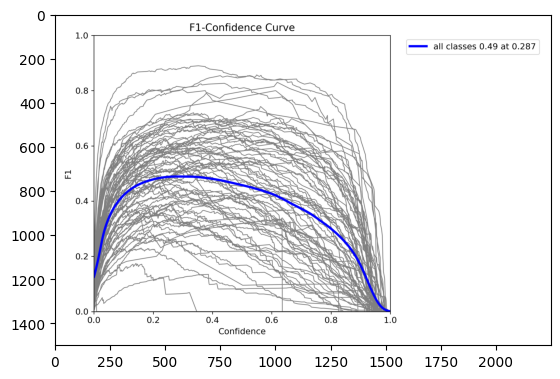

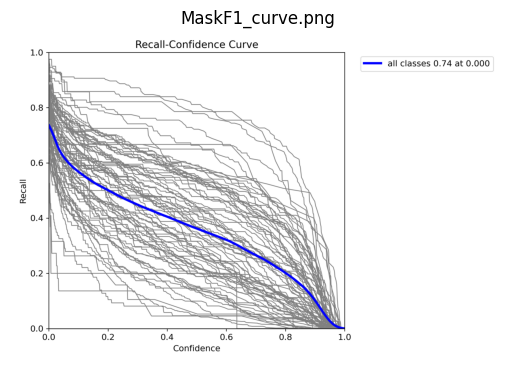

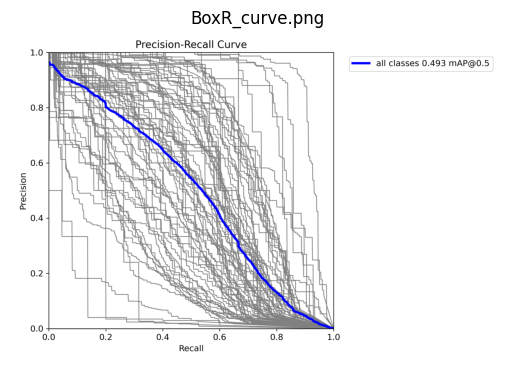

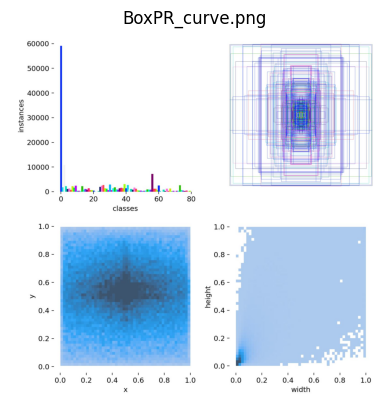

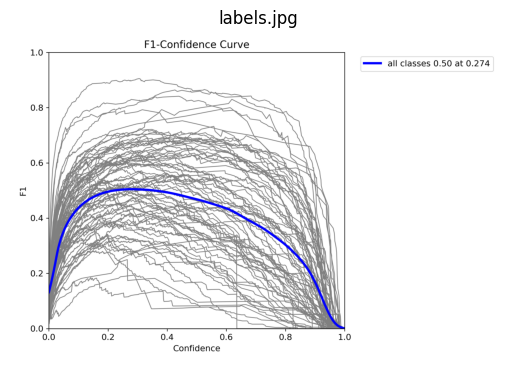

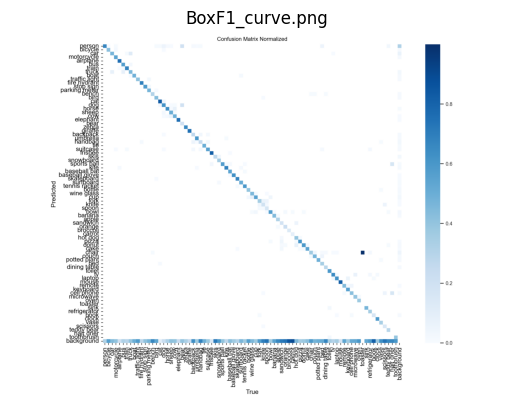

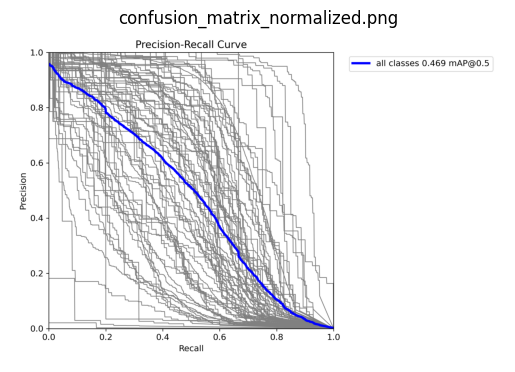

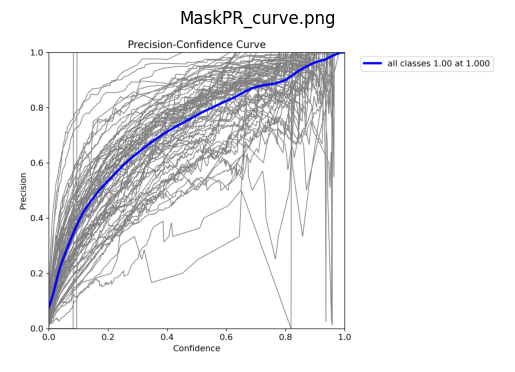

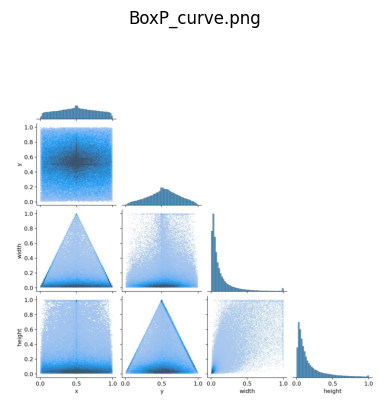

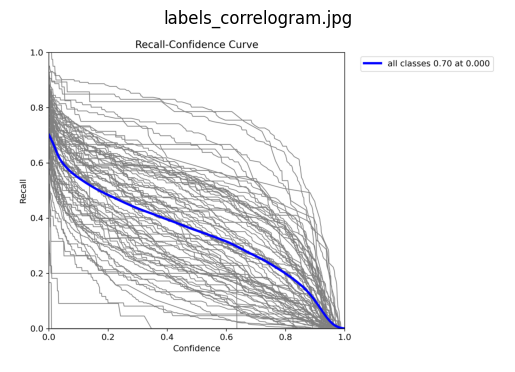

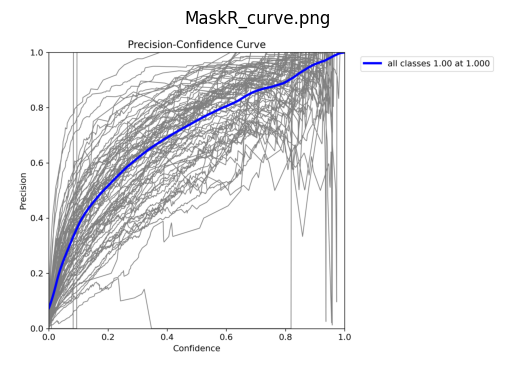

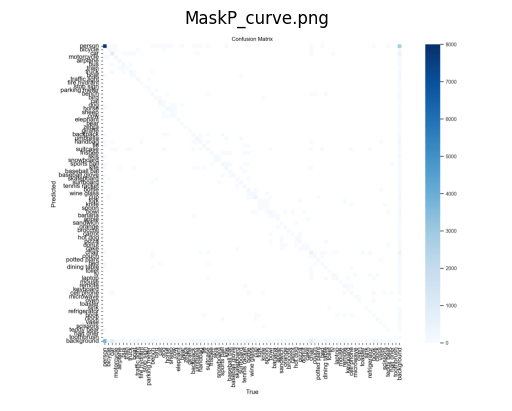

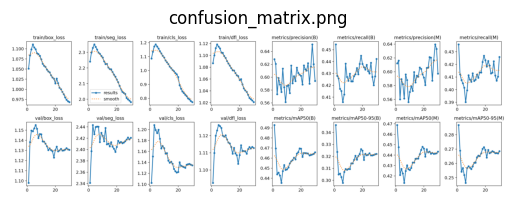

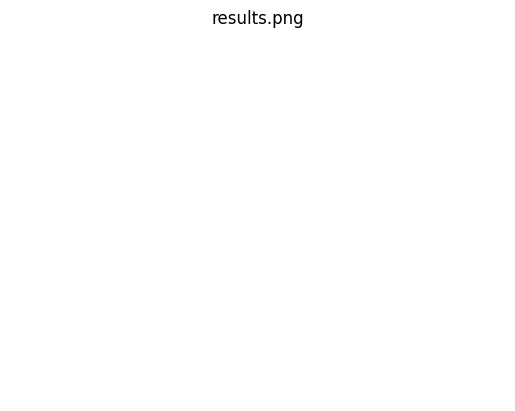

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

directory = "/content/COCO"
files = os.listdir(directory)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    plt.axis("off")
    plt.title(image_file)
    plt.show

In [6]:
### INFERENCIAS COCOSAMPLE
!wget https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/ImageTestYolo/COCOSAMPLE/COCOSAMPLE.zip

!unzip -q COCOSAMPLE.zip -d COCOSAMPLE

--2024-11-11 03:01:33--  https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/ImageTestYolo/COCOSAMPLE/COCOSAMPLE.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/COCOSAMPLE/COCOSAMPLE.zip [following]
--2024-11-11 03:01:33--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/COCOSAMPLE/COCOSAMPLE.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1574031 (1.5M) [application/zip]
Saving to: ‘COCOSAMPLE.zip’

COCOSAMPLE.zip      100%[===================>]   1.50M  --.-KB/s    in 0.07s   

2024

In [7]:
!pip install ultralytics
from ultralytics import YOLO
import os
from PIL import Image

# Cargar el modelo pre-entrenado de YOLO
model = YOLO('/content/COCO/weights/best.pt')  # o la ruta a tu modelo entrenado

# Directorio con las imágenes
image_dir = '/content/COCOSAMPLE'

# Hacer inferencia en todas las imágenes
for img_name in os.listdir(image_dir):
   if img_name.endswith(('.jpg', '.jpeg', '.png')):
       img_path = os.path.join(image_dir, img_name)
       results = model.predict(source=img_path, save=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 16.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/COCOSAMPLE/000000000069.jpg: 448x640 5 persons, 5 bottles, 3 wine glasss, 1 chair, 1 dining table, 2 tvs, 894.6ms
Speed: 8.1ms preprocess, 894.6ms inference, 77.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict

image 1/1 /content/COCOSAMPLE/000000001076.jpg: 448x640 18 persons, 1 frisbee, 1 baseball glove, 531.7ms
Speed: 2.3ms preprocess, 531.7ms inference, 48.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict

image 1/1 /content/COCOSAMPLE/000000000674.jpg: 640x480 1 person, 1 dog, 1 wine glass, 1 bowl

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

directory = "/content/runs/segment/predict"
files = os.listdir(directory)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    plt.axis("off")
    plt.title(image_file)
    plt.show

Output hidden; open in https://colab.research.google.com to view.

In [10]:
!wget https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/ImageTestYolo/personas.zip

--2024-11-11 03:04:21--  https://github.com/LuisAngelOlveraOlvera/YoloExamples/raw/main/ImageTestYolo/personas.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas.zip [following]
--2024-11-11 03:04:21--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23534505 (22M) [application/zip]
Saving to: ‘personas.zip’

personas.zip        100%[===================>]  22.44M  70.4MB/s    in 0.3s    

2024-11-11 03:04:22 (70.4 MB/s) - ‘personas.z

In [11]:
!unzip -q personas.zip -d PERSONS

In [12]:
# Cargar el modelo pre-entrenado de YOLO
model = YOLO('/content/COCO/weights/best.pt')  # o la ruta a tu modelo entrenado

# Directorio con las imágenes
image_dir = '/content/PERSONS'

# Hacer inferencia en todas las imágenes
for img_name in os.listdir(image_dir):
   if img_name.endswith(('.jpg', '.jpeg', '.png')):
       img_path = os.path.join(image_dir, img_name)
       results = model.predict(source=img_path, save=True)


image 1/1 /content/PERSONS/personas1.png: 448x640 16 persons, 538.6ms
Speed: 2.9ms preprocess, 538.6ms inference, 49.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict2

image 1/1 /content/PERSONS/personas_detection.jpeg: 640x480 10 persons, 841.8ms
Speed: 2.7ms preprocess, 841.8ms inference, 46.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict2

image 1/1 /content/PERSONS/personas2.png: 320x640 6 persons, 1 bench, 1 tie, 1 chair, 1226.7ms
Speed: 3.2ms preprocess, 1226.7ms inference, 65.9ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/segment/predict2

image 1/1 /content/PERSONS/personas_cine.jpg: 480x640 13 persons, 1 umbrella, 2 handbags, 2 tvs, 925.9ms
Speed: 8.2ms preprocess, 925.9ms inference, 50.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2

image 1/1 /content/PERSONS/pose4.jpg: 640x512 5 persons, 1 cell phone, 652.9ms
Speed: 3.9ms 

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

directory = "/content/runs/segment/predict2"
files = os.listdir(directory)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    plt.axis("off")
    plt.title(image_file)
    plt.show

Output hidden; open in https://colab.research.google.com to view.

In [14]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato1.jpg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato2.JPG
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG

--2024-11-11 03:06:56--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213012 (208K) [image/jpeg]
Saving to: ‘Minicky.jpeg’

Minicky.jpeg        100%[===================>] 208.02K  --.-KB/s    in 0.04s   

2024-11-11 03:06:57 (5.74 MB/s) - ‘Minicky.jpeg’ saved [213012/213012]

--2024-11-11 03:06:57--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [15]:
# Cargar el modelo pre-entrenado de YOLO
model = YOLO('/content/COCO/weights/best.pt')  # o la ruta a tu modelo entrenado

# Directorio con las imágenes
image_dir = '/content'

# Hacer inferencia en todas las imágenes
for img_name in os.listdir(image_dir):
   if img_name.endswith(('.jpg', '.jpeg', '.png')):
       img_path = os.path.join(image_dir, img_name)
       results = model.predict(source=img_path, save=True)


image 1/1 /content/Pelusa.jpeg: 640x480 1 bench, 1 cat, 1 backpack, 3 chairs, 1 book, 560.2ms
Speed: 3.7ms preprocess, 560.2ms inference, 19.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict3

image 1/1 /content/Minicky.jpeg: 640x480 1 cat, 844.5ms
Speed: 3.3ms preprocess, 844.5ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict3

image 1/1 /content/gato1.jpg: 480x640 1 cat, 879.8ms
Speed: 4.5ms preprocess, 879.8ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict3


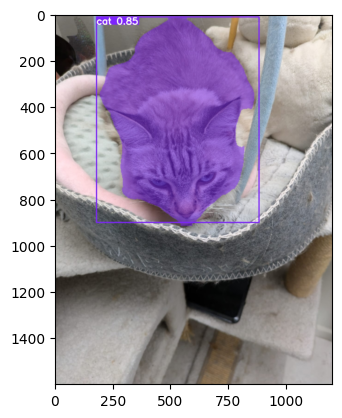

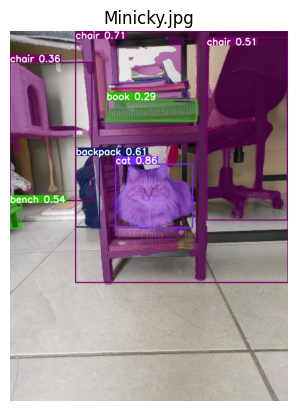

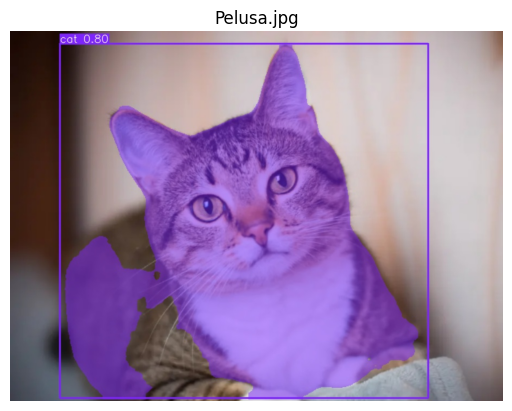

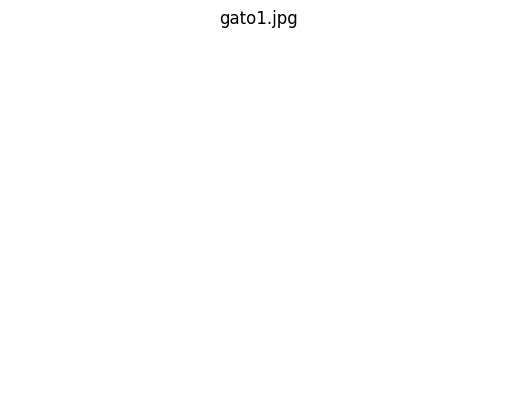

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

directory = "/content/runs/segment/predict3"
files = os.listdir(directory)
image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    plt.axis("off")
    plt.title(image_file)
    plt.show